<span style="font-family: Arial;">

# Project 2 - Power Generation Data Set

*Jonathan Chartrand and Robert Boutette*

[Data source](https://www.kaggle.com/datasets/ccanb23/iea-monthly-electricity-statistics)

## 1.0   Dataset Selection and Loading

### 1.1.   Introduction
The dataset selected for analysis in this project was sourced from the International Energy Agency (IEA) through their Monthly Electricity Statistics tool. This comprehensive dataset covers monthly energy production data across various countries from 2010 to 2022, measured in gigawatt-hours (GWh). It encompasses a wide range of energy sources, including hydro, wind, solar, geothermal, nuclear, and both renewable and non-renewable combustible fuels. The data provides a detailed overview of the global energy production landscape, offering insights into the trends and shifts in energy sources across different regions and times. This dataset, compiled and made accessible through a dedicated scraper available on GitHub, represents a rich resource for understanding global energy production dynamics.


### 1.2.   Data Overview
The following code snippet provides an initial overview of the dataset, including the number of rows and columns, the data types of the columns, and the first 5 rows of the dataset. This information is essential for understanding the structure and content of the dataset, which will guide the subsequent steps in the analysis process:
</span>


In [63]:
import pandas as pd

# Load the data
df = pd.read_csv('data.csv')
# Print the number of rows and columns
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

# Print the data types of the columns
print('\nData types:')
print(df.dtypes)

# Display the first 5 rows
print('\nFirst 5 rows:')
df.head(5)

Number of rows: 181915
Number of columns: 12

Data types:
COUNTRY                object
CODE_TIME              object
TIME                   object
YEAR                    int64
MONTH                   int64
MONTH_NAME             object
PRODUCT                object
VALUE                 float64
DISPLAY_ORDER           int64
yearToDate            float64
previousYearToDate    float64
share                 float64
dtype: object

First 5 rows:


,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730,7,214302.969,NaN,0.930108


---
<span style="font-family: Arial;">

### 1.3.   Data Description
<p>Our dataset offers a clear view of electricity generation from different countries, capturing data from 2010 to 2022. It provides insights into the types of energy each country has used, including renewables like hydro, wind, and solar, and conventional sources such as coal, oil, and natural gas. We can see not just the amount of energy produced, but also the blend of energy types, energy trade figures, and the extent of consumption.</p>
<p>By looking at this data, we can track how energy production varies by country and month, understand the changing reliance on various energy sources, and gauge the movement towards renewable energy. The dataset serves as a practical resource to observe global energy production trends and the collective shift toward more sustainable energy options.</p>

<p>

---

</p>

## 2.0.   Data Exploration
In the Data Exploration section, we'll compute and review basic statistics such as mean, median, standard deviation, minimum, and maximum for the numerical features within our dataset. This will help us understand the central tendencies and variability of our data. Additionally, we will examine the shape of the data distributions, determining whether they're normally distributed, skewed, or have other notable characteristics. To aid our understanding, we'll visualize the distributions and utilize statistical tests to support our observations. This step is crucial for preparing our dataset for any subsequent analysis and gaining insights from the numbers.

### 2.1   Descriptive Statistics
The following code will calculate basic statistics of numerical features in the dataset, such as mean, median, standard deviation, minimum, and maximum values of the overall consumption. This will provide a clear understanding of the central tendencies and variability of the data, which is essential for identifying any outliers or unusual patterns. For this analysis we will be omitting the following "Countries", as they represent numerous countries that may be included in the data: *'IEA Total', 'OECD Americas', 'OECD Asia Oceania', 'OECD Europe', 'OECD Total'.* 
</span>


In [24]:
# List of countries to omit
omit_countries = ['IEA Total', 'OECD Americas', 'OECD Asia Oceania', 'OECD Europe', 'OECD Total']

# Filter the DataFrame to exclude the countries in the omit list
filtered_df = df[~df['COUNTRY'].isin(omit_countries)]

# Sum of the entire 'VALUE' column for the filtered DataFrame
total_value = filtered_df['VALUE'].sum()
print(f"Total Energy Consumption: {total_value:.2f}")

# Basic statistics of numerical features in the filtered DataFrame
stats = filtered_df['VALUE'].describe()

# Print each statistic in the desired format
print(f"Mean: {stats['mean']:.2f}")
print(f"Median: {filtered_df['VALUE'].median():.2f}")
print(f"std: {stats['std']:.2f}")
print(f"Min: {stats['min']:.2f}")
print(f"Max: {stats['max']:.2f}")

Total Energy Consumption: 1046244510.40
Mean: 6500.39
Median: 525.86
std: 26238.19
Min: -6852.34
Max: 436179.29


---
<span style="font-family: Arial;">

Based on the provided statistics, which represents total energy consumption, the data seems to exhibit a right-skewed distribution. This is suggested by the fact that the mean (**6,500.39**) is significantly larger than the median (**525.86**), indicating that there are some high values pulling the mean upwards.  The standard deviation is quite large (**26,328.19**), suggesting a wide spread of data around the mean. The minimum value is negative (**-6,852.34**), which might be due to data entry errors, or it could represent some form of energy credit or return. The maximum value is quite large (**436,179.29**), indicating the presence of some very high energy consumption values. This is to be expected in this type of data set, as consumption is reported monthly by product - and some products are used very little - whereas others are used in large quantities. Furthermore, energy consumption by country will vary greatly, with some countries consuming much more energy than others. <p>To improve our analysis of this data set, we will find the summation of global consumption each year and compare the data year over year instead: </span>
</p>



In [69]:
# Filter the DataFrame to exclude the countries in the omit list
filtered_df = df[~df['COUNTRY'].isin(omit_countries)]

# Group the filtered DataFrame by 'YEAR' and calculate the sum of 'VALUE' for each year
yearly_sums = filtered_df.groupby('YEAR')['VALUE'].sum()

# Calculate the basic statistics for the yearly sums
yearly_stats = yearly_sums.describe()

# Print the total energy consumption for each year
print("Yearly Total Energy Consumption:")
print(yearly_sums)

# Print each statistic in the desired format
print("\nYearly Statistics:")
print(f"Mean: {yearly_stats['mean']:.2f}")
print(f"Median: {yearly_sums.median():.2f}")
print(f"std: {yearly_stats['std']:.2f}")
print(f"Min: {yearly_stats['min']:.2f}")
print(f"Max: {yearly_stats['max']:.2f}")

Yearly Total Energy Consumption:
YEAR
2010    7.045549e+07
2011    7.037131e+07
2012    7.057817e+07
2013    7.040980e+07
2014    7.068564e+07
2015    8.492281e+07
2016    8.619505e+07
2017    8.668744e+07
2018    8.891105e+07
2019    8.788134e+07
2020    8.558356e+07
2021    8.654018e+07
2022    8.702267e+07
Name: VALUE, dtype: float64

Yearly Statistics:
Mean: 80480346.95
Median: 85583555.43
std: 8268588.95
Min: 70371309.94
Max: 88911048.50


---

<span style="font-family: Arial;">
This data is much more suitable for analysis as the mean and median are much closer. However, the std seems high, but this could be due to the large range of energy consumption values. To verify the std, we can calculate the coefficient of variation: </span>

In [28]:
# Calculate the coefficient of variation
cv = yearly_stats['std'] / yearly_stats['mean']
print(f"Coefficient of Variation: {cv:.2f}")

Coefficient of Variation: 0.10


---
<span style="font-family: Arial;">
The coefficient of variation is 0.10, which is acceptable. This suggests that the yearly energy consumption values are relatively consistent and do not vary widely from the mean. Now that we are confident in our data, we can move on to visualizing the distribution of energy consumption over the years. 

---

## 3.0   Data Visualization

We can visually analyze the annual comparison data that we just achieved using a histogram with the following code: </span>

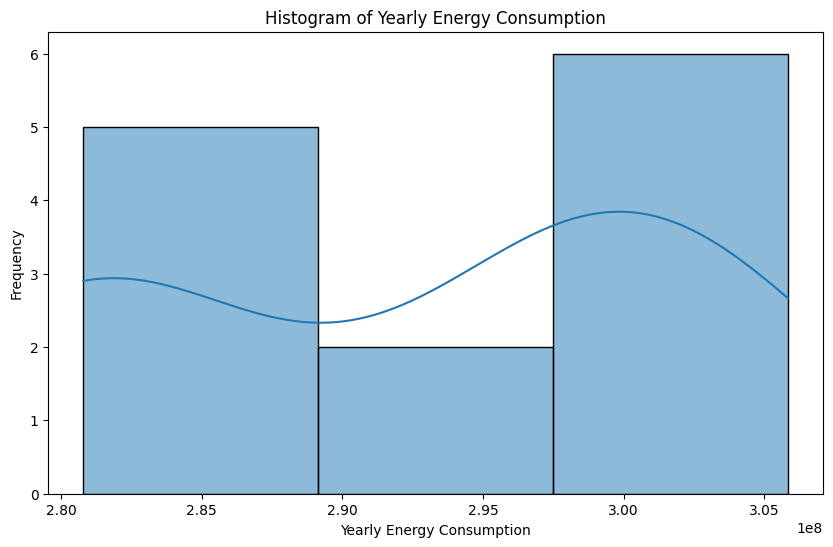

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Group the DataFrame by 'YEAR' and calculate the sum of 'VALUE' for each year
yearly_sums = df.groupby('YEAR')['VALUE'].sum()

# Determine the number of bins using the square root rule
num_bins = int(np.sqrt(yearly_sums.count()))

# Plot a histogram
plt.figure(figsize=(10, 6))
sns.histplot(yearly_sums, bins=num_bins, kde=True)
plt.title('Histogram of Yearly Energy Consumption')
plt.xlabel('Yearly Energy Consumption')
plt.ylabel('Frequency')
plt.show()

---
<span style="font-family: Arial;">
We can go even further and compare the geographical totals over this time period by creating a bar chart. This will allow us to see the differences in energy consumption between countries: </span>

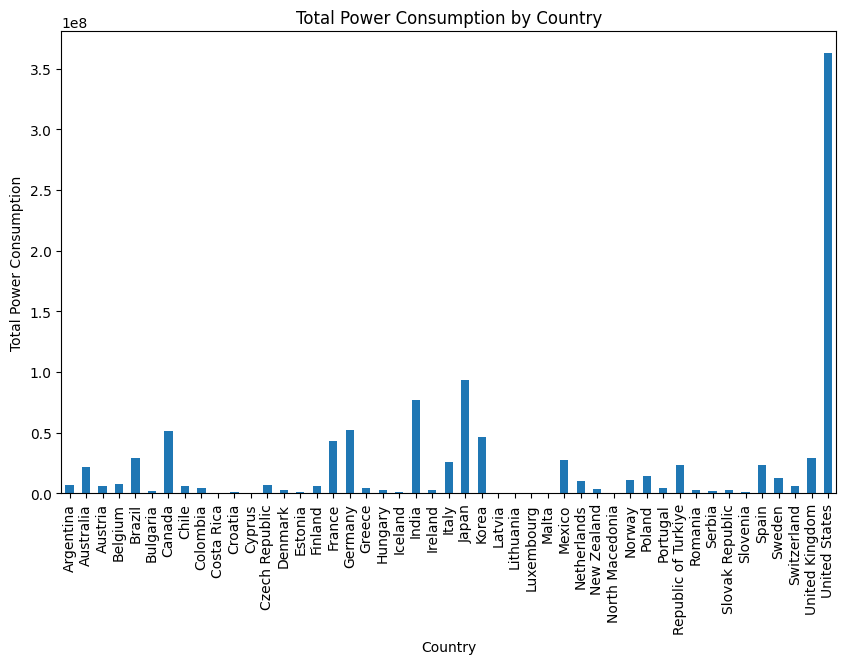

In [25]:
# Filter the DataFrame to exclude the countries in the omit list
filtered_df = df[~df['COUNTRY'].isin(omit_countries)]

# Group the filtered DataFrame by 'COUNTRY' and calculate the sum of 'VALUE' for each country
country_sums = filtered_df.groupby('COUNTRY')['VALUE'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
country_sums.plot(kind='bar')
plt.title('Total Power Consumption by Country')
plt.xlabel('Country')
plt.ylabel('Total Power Consumption')
plt.show()

---
<span style="font-family: Arial;">
To further analyze the data, we can create a scatter plot to visualize the total energy consumption over time. This will allow us to observe the trends in energy consumption over the years. </span>

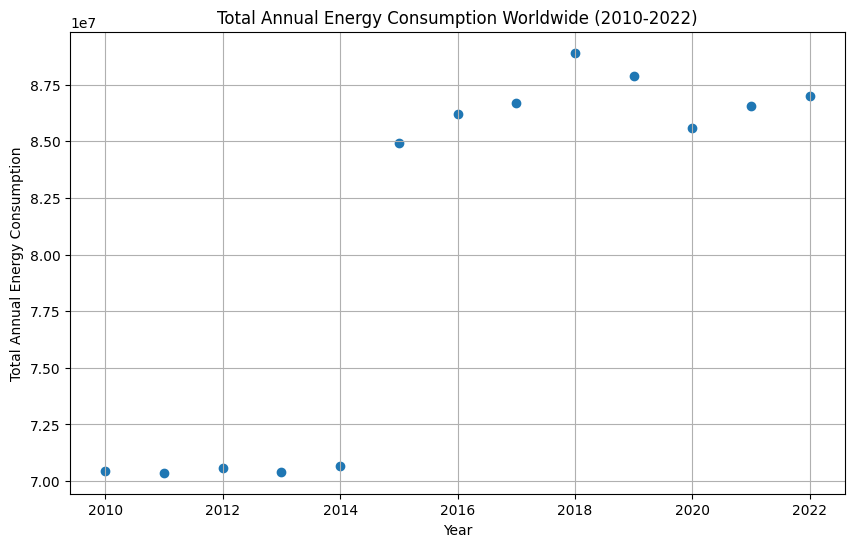

In [47]:
# Filter the DataFrame to exclude the countries in the omit list
filtered_df = df[~df['COUNTRY'].isin(omit_countries)]

# Group the filtered DataFrame by 'YEAR' and calculate the sum of 'VALUE' for each year
yearly_totals = filtered_df.groupby('YEAR')['VALUE'].sum()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(yearly_totals.index, yearly_totals.values)
plt.title('Total Annual Energy Consumption Worldwide (2010-2022)')
plt.xlabel('Year')
plt.ylabel('Total Annual Energy Consumption')
plt.grid(True)
plt.show()

---
<span style="font-family: Arial;">
There is a noticable jump from 2014 to 2015, which could be due to a number of factors. However, we can analyze the data that we have to try and explain this change. First, we'll filter our data set to determine countries which reported for the first time in 2015, and determine the summation of their annual consumption reported:</span>

In [67]:
def calculate_total_consumption(df, countries, year):
    # Filter the DataFrame to only include rows where the 'COUNTRY' column's value is in the list of countries and the 'YEAR' column's value is the specified year
    filtered_df = df[(df['COUNTRY'].isin(countries)) & (df['YEAR'] == year)]

    # Sum the 'VALUE' column of the filtered DataFrame
    total_value = filtered_df['VALUE'].sum()

    return total_value

# Group the DataFrame by 'COUNTRY' and get the minimum 'YEAR' for each country
min_years = df.groupby('COUNTRY')['YEAR'].min()

# Filter the result to only include countries where the minimum 'YEAR' is 2015
countries_started_2015 = min_years[min_years == 2015].index

# Calculate and print the total consumption for countries that started in 2015
total_value_2015 = calculate_total_consumption(df, countries_started_2015, 2015)
print(f"Countries that started data in 2015: {list(countries_started_2015)}")
print(f"Total consumption for countries that started in 2015: {total_value_2015:.2f}")

# Calculate and print the total consumption in 2014 for all non-omitted countries
total_value_2014 = calculate_total_consumption(df, ~df['COUNTRY'].isin(omit_countries), 2014)
print(f"Total consumption in 2014 for all non-omitted countries: {total_value_2014:.2f}")

# Calculate and print the total consumption in 2015 for all non-omitted countries
total_value_2015_all = calculate_total_consumption(df, ~df['COUNTRY'].isin(omit_countries), 2015)
print(f"Total consumption in 2015 for all non-omitted countries: {total_value_2015_all:.2f}")

# Add the total energy consumption for the countries that started reporting in 2015 to the total energy consumption for 2014
total_value_2014_2015 = total_value_2014 + total_value_2015
print(f"Total consumption in 2014 + 2015 consumption for countries that started in 2015: {total_value_2014_2015:.2f}")


Countries that started data in 2015: ['Argentina', 'Brazil', 'Bulgaria', 'Croatia', 'Cyprus', 'India', 'Malta', 'North Macedonia', 'Romania', 'Serbia']
Total consumption for countries that started in 2015: 13951366.13
Total consumption in 2014 for all non-omitted countries: 0.00
Total consumption in 2015 for all non-omitted countries: 0.00
Total consumption in 2014 + 2015 consumption for countries that started in 2015: 13951366.13


---
<span style="font-family: Arial;">
**This quick analysis provides a reasonable explanation for this significant change!** </span>

---

## 4.0   Data Manipulation

### 4.1   Canada's Historical Energy Consumption (2010-2022)
<span style="font-family: Arial;">
The following code will be utilized to output basic statistics for Canadian annual energy consumption from 2010 to 2022:
</span>

In [68]:
# Filter the DataFrame to only include rows where the 'Country' column is 'Canada'
canada_df = df.loc[df['COUNTRY'] == 'Canada']

# Display the filtered DataFrame
canada_df

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
70,Canada,JAN2010,January 2010,2010,1,January,Hydro,37885.199000,1,347981.000000,NaN,0.627949
71,Canada,JAN2010,January 2010,2010,1,January,Wind,631.406000,2,8637.002000,NaN,0.010466
72,Canada,JAN2010,January 2010,2010,1,January,Solar,1.898000,3,253.000000,NaN,0.000031
73,Canada,JAN2010,January 2010,2010,1,January,Other renewables,1.716000,5,28.000000,NaN,0.000028
74,Canada,JAN2010,January 2010,2010,1,January,Nuclear,7704.885000,6,85527.000000,NaN,0.127709
...,...,...,...,...,...,...,...,...,...,...,...,...
180912,Canada,DEC2022,December 2022,2022,12,December,Non-renewables,17757.847617,23,192420.086486,198816.054452,0.288657
180913,Canada,DEC2022,December 2022,2022,12,December,Others,492.868225,24,4876.114781,5249.555986,0.008012
180914,Canada,DEC2022,December 2022,2022,12,December,Other renewables aggregated,971.109098,25,9494.741321,9655.367305,0.015786
180915,Canada,DEC2022,December 2022,2022,12,December,Low carbon,50286.246851,26,528623.545177,514806.123867,0.817412


---
### 4.2   Basic Statistics for Each Year
<span style="font-family: Arial;">
Next, we'll separate this data into separate years and calculate the basic statistics for each year and display. This time, instead of focusing on year over year - we will instead calculate the mean, median, std, etc. by comparing the consumption of each energy source in Canada by year. This will allow us to see the growth of each energy source over time. </span>
</span>

In [31]:
# First, filter the DataFrame for entries where the 'COUNTRY' column is 'Canada'
canada_df = df.loc[df['COUNTRY'] == 'Canada']

# Group the DataFrame by 'YEAR' and 'PRODUCT', and calculate the sum of 'VALUE' for each group
grouped_df = canada_df.groupby(['YEAR', 'PRODUCT'])['VALUE'].sum().reset_index()

# Get unique years present in the grouped_df
unique_years = grouped_df['YEAR'].unique()

# Create a function to format the stats output
def format_stats(year, stats):
    return f"{year}:\n" + \
           f"mean\t{stats['mean']:.2f}\n" + \
           f"median\t{stats['median']:.2f}\n" + \
           f"std\t{stats['std']:.2f}\n" + \
           f"min\t{stats['min']:.2f}\n" + \
           f"max\t{stats['max']:.2f}\n"

# Loop through each unique year, calculate stats, format and print them
for year in unique_years:
    # Filter the DataFrame for the specific year
    year_df = grouped_df[grouped_df['YEAR'] == year]
    
    # Calculate the required statistics for the 'VALUE' column
    stats = year_df['VALUE'].agg(['mean', 'median', 'std', 'min', 'max'])
    
    # Format and print the stats
    print(format_stats(year, stats))

2010:
mean	142841.57
median	46191.48
std	195544.20
min	28.00
max	585443.00

2011:
mean	149139.54
median	52395.00
std	204278.14
min	26.00
max	614396.00

2012:
mean	148689.87
median	53818.06
std	203799.83
min	27.00
max	614737.00

2013:
mean	154317.23
median	54057.17
std	211692.06
min	15.00
max	639534.00

2014:
mean	155055.44
median	55446.03
std	212298.29
min	15.00
max	641276.00

2015:
mean	153806.70
median	58736.35
std	211162.78
min	13.00
max	638494.00

2016:
mean	155168.93
median	57855.35
std	212907.28
min	19.00
max	644436.99

2017:
mean	154774.91
median	53339.21
std	214728.44
min	6.00
max	644141.00

2018:
mean	147264.56
median	43836.96
std	211786.91
min	0.00
max	635394.00

2019:
mean	145376.75
median	40152.52
std	209081.23
min	0.00
max	627229.00

2020:
mean	143856.99
median	36952.72
std	207572.38
min	0.00
max	623468.42

2021:
mean	145101.96
median	36974.30
std	208808.50
min	0.00
max	625950.94

2022:
mean	159713.79
median	51358.46
std	217879.50
min	125.23
max	638446.81


---
<span style="font-family: Arial;">
Similar to the previous section where we analyzed total energy consumption, the mean and median are very much out of sync with each other. This is due to the fact that some energy sources are used much more than others. We can further analyze this data by calculating the average annual use for each product and then identifying the product with the highest and lowest average annual use. This will provide a better understanding of the energy landscape in Canada. </span>

In [35]:
# Get a list of unique products
unique_products = canada_df['PRODUCT'].unique()

# Initialize a dictionary to store annual mean values for each product
annual_means = {product: [] for product in unique_products}

# Calculate the annual mean for each product
for year in unique_years:
    yearly_data = canada_df[canada_df['YEAR'] == year]
    for product in unique_products:
        annual_mean = yearly_data[yearly_data['PRODUCT'] == product]['VALUE'].mean()
        annual_means[product].append(annual_mean)
        
# Calculate the average annual use for each product
average_annual_use = {product: sum(values) / len(values) for product, values in annual_means.items()}

# Find the product with the highest average annual use
highest_energy_type = max(average_annual_use, key=average_annual_use.get)
highest_average_use = average_annual_use[highest_energy_type]

# Find the product with the lowest average annual use
lowest_energy_type = min(average_annual_use, key=average_annual_use.get)
lowest_average_use = average_annual_use[lowest_energy_type]

# Print out the highest and lowest energy types and their average annual use
print(f"The highest energy type is {highest_energy_type} with an average annual use of {highest_average_use:.2f} GWh.")
print(f"The lowest energy type is {lowest_energy_type} with an average annual use of {lowest_average_use:.2f} GWh.")

The highest energy type is Net electricity production with an average annual use of 52390.69 GWh.
The lowest energy type is Other combustible non-renewables with an average annual use of 8.13 GWh.


---
### 4.3  Visualization of Annual Energy Consumption
<span style="font-family: Arial;">
Now, we'll create a visualization to display the annual energy consumption for Canada from 2010 to 2022, the difference beween the mean and median can be clearly observed. To support this, we'll also create a bar chart to display the average annual consumption in Canada by product. </span>

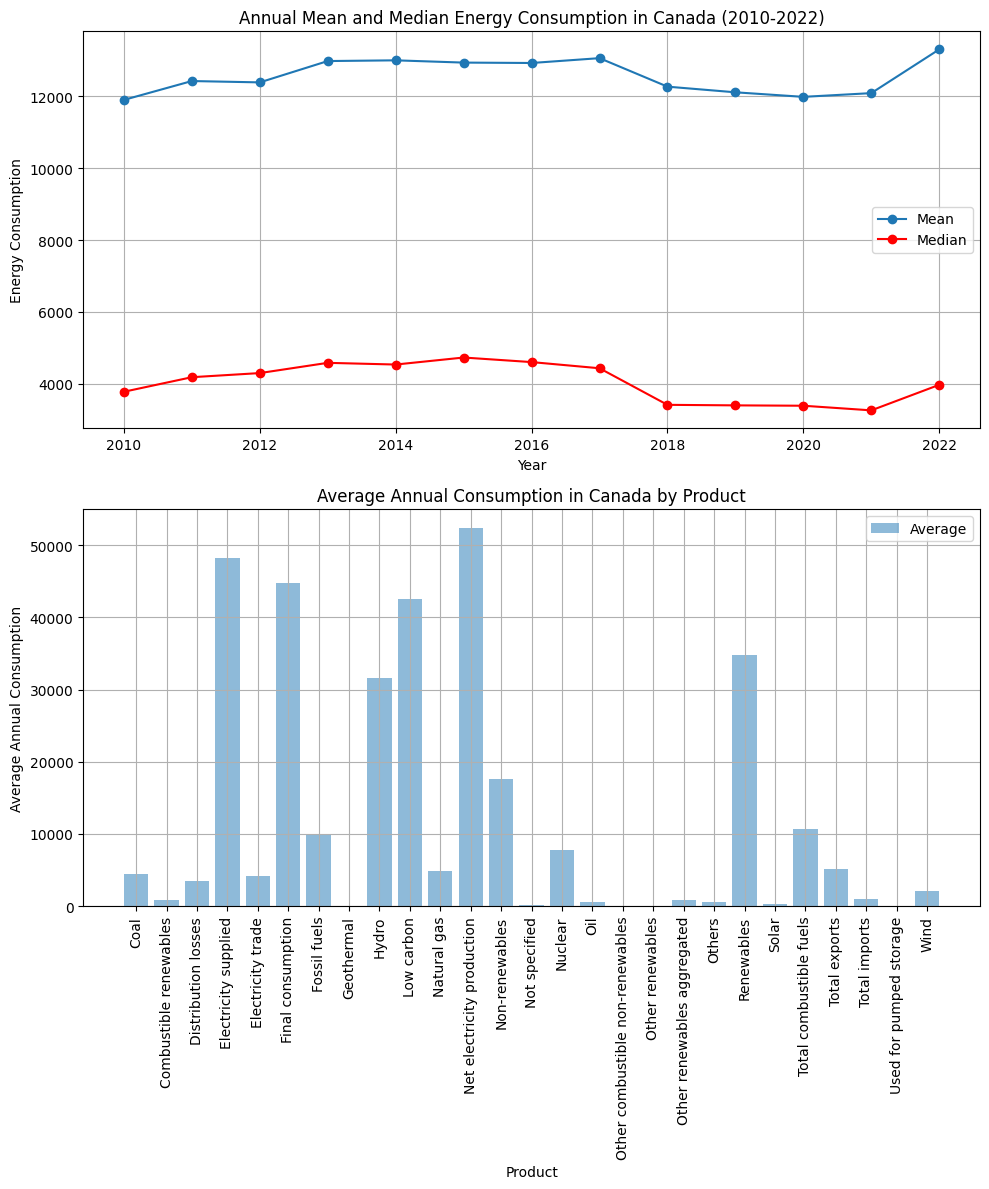

In [37]:
import matplotlib.pyplot as plt

# Initialize lists to store the years, mean values, median values, min values, and max values
years = []
means = []
medians = []
max_values = []

# Loop through each unique year, calculate stats, and store them in the lists
for year in unique_years:
    # Filter the DataFrame for the specific year
    year_df = canada_df[canada_df['YEAR'] == year]

    # Calculate the required statistics for the 'VALUE' column
    stats = year_df['VALUE'].agg(['mean', 'median', 'std', 'min', 'max'])

    # Store the year, mean value, median value, min value, and max value
    years.append(year)
    means.append(stats['mean'])
    medians.append(stats['median'])
    max_values.append(stats['max'])

# Create a figure with two subplots
fig, axs = plt.subplots(2, figsize=(10, 12))

# First subplot: line plot of the mean values and scatter plot of the median values over the years
axs[0].plot(years, means, marker='o', label='Mean')
axs[0].plot(years, medians, marker='o', color='red', label='Median')
axs[0].set_title('Annual Mean and Median Energy Consumption in Canada (2010-2022)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Energy Consumption')
axs[0].grid(True)
axs[0].legend()

# Second subplot: bar chart of the average annual consumption in Canada based on PRODUCT
product_means = canada_df.groupby('PRODUCT')['VALUE'].mean()
axs[1].bar(product_means.index, product_means.values, alpha=0.5, label='Average')
axs[1].set_title('Average Annual Consumption in Canada by Product')
axs[1].set_xlabel('Product')
axs[1].set_ylabel('Average Annual Consumption')
axs[1].grid(True)
axs[1].legend()

# Rotate x-axis labels
plt.xticks(rotation='vertical')

# Show the figure
plt.tight_layout()
plt.show()

<span style="font-family: Arial;">
We can elaborate on this further to provide visual representation of the growth in various energy sources over the years. This will provide a more detailed understanding of the energy landscape in Canada. To do this, we'll filter by product and produce two separate plots: one for energy sources > 20,000 GWh and another for energy sources < 20,000 GWh. This will allow us to better visualize the trends for each energy source.
</span>

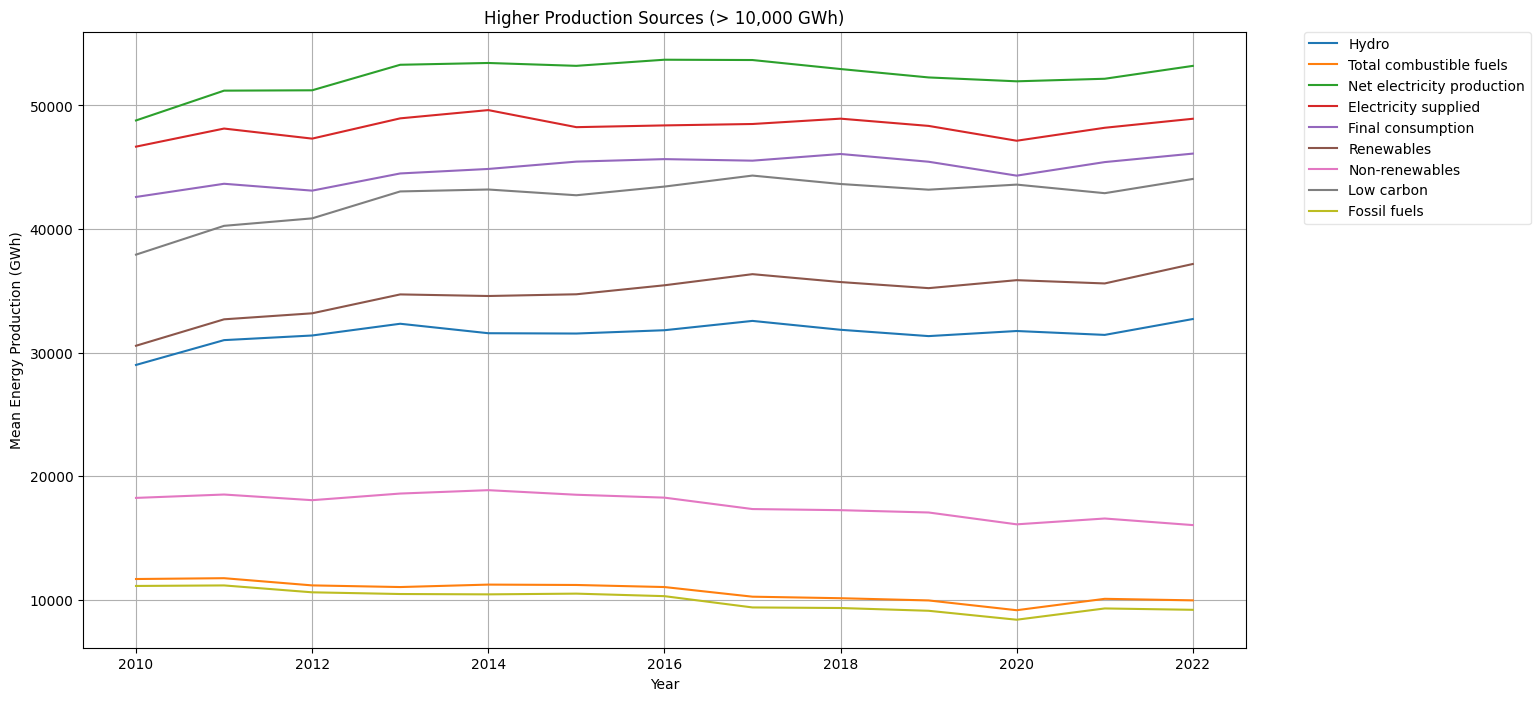

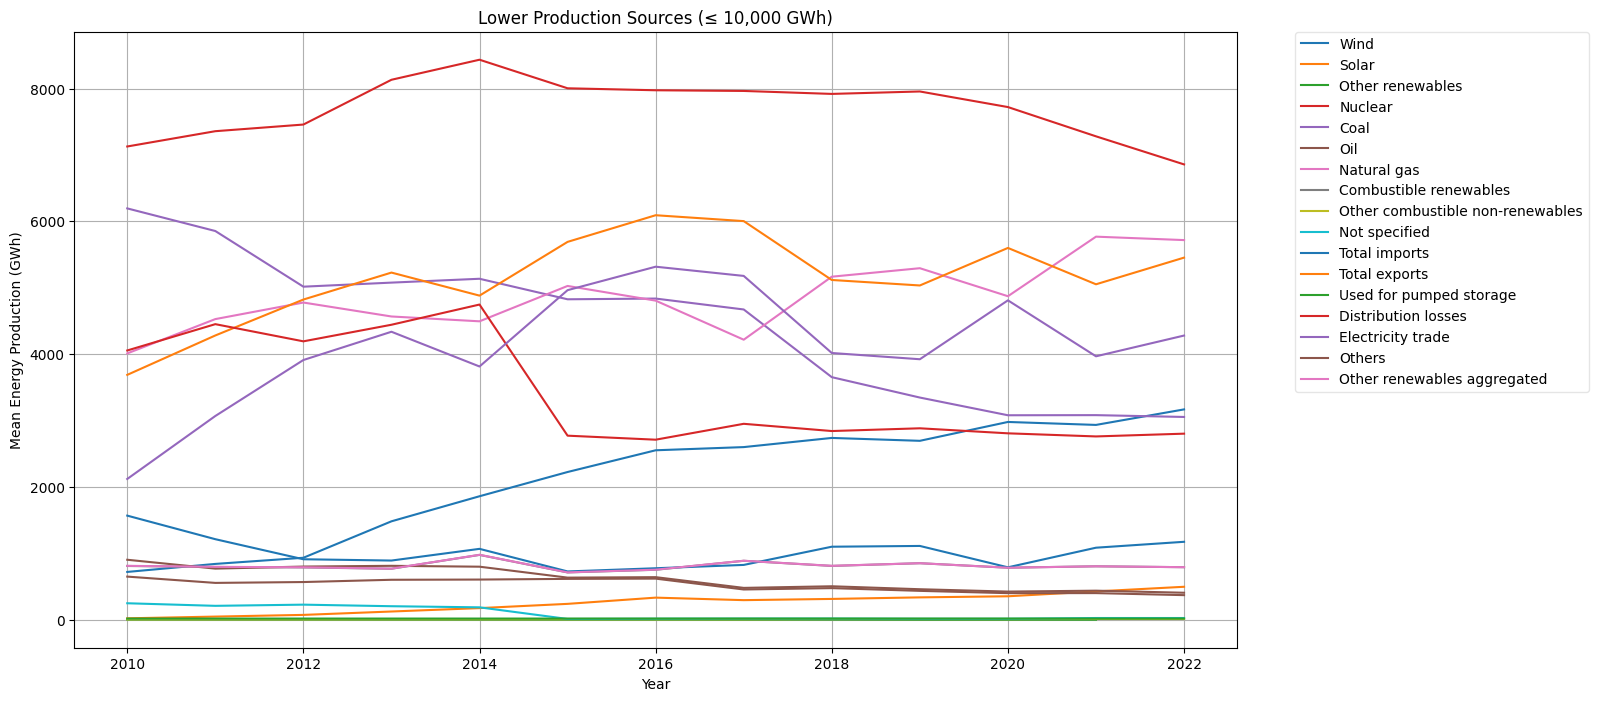

In [66]:
# Get unique years present in the canada_df
unique_years = sorted(canada_df['YEAR'].unique())

# Get a list of unique products
unique_products = canada_df['PRODUCT'].unique()

# Initialize a dictionary to store annual mean values for each product
annual_means = {product: [] for product in unique_products}

# Calculate the annual mean for each product
for year in unique_years:
    yearly_data = canada_df[canada_df['YEAR'] == year]
    for product in unique_products:
        annual_mean = yearly_data[yearly_data['PRODUCT'] == product]['VALUE'].mean()
        annual_means[product].append(annual_mean)

# Separate the products based on the specified threshold mean value
higher_production = {product: values for product, values in annual_means.items() if max(values) > 10000}
lower_production = {product: values for product, values in annual_means.items() if max(values) <= 10000}

# Function to create plots
def create_plots(production_dict, title):
    plt.figure(figsize=(15, 8))
    for product, means in production_dict.items():
        plt.plot(unique_years, means, label=product)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Mean Energy Production (GWh)')
    # Place the legend outside the plot area with a transparency of 0.5
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., framealpha=0.5)
    plt.grid(True)
    plt.show()

# Plot for higher production sources
create_plots(higher_production, 'Higher Production Sources (> 10,000 GWh)')

# Plot for lower production sources
create_plots(lower_production, 'Lower Production Sources (≤ 10,000 GWh)')